<div style='text-align: center;'>
    <h1><b>Machine Learning for Engineering and Science Applications</b></h1>
    <h2>Week-5 Logistic Regression</h2>
</div>

Pre-requisite to understand the code
* Basic Knowledge in Python
* Knowledge on Vectorization and Vector Manipulation
<br>
<br>

Resources for understanding this section
1. MLESA Week - 5 Lecture (https://nptel.ac.in/courses/106106198)

<br>

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

<div style='text-align: center;'>
    <h2>A. Logistic Regression Model</h2>
</div>

In [2]:
# General Logistic Regression Model - Only 2 weights (Binomial Classification)
class GeneralLogisticRegression:
    
    def __init__(self, x, y, learning_rate, epoch):
        # Augment 1 to every instance to accomodate for the Bias
        self.x = np.insert(x, 0, 1, axis=1)
        self.y = y
        self.alpha = learning_rate
        self.epoch = epoch
        # Initiate gradients and weights to zero
        # Number of Samples and Number of Features
        self.samples, self.features = self.x.shape
        self.w = np.zeros(self.features)
        self.gradient = np.zeros(self.features)
    
    # Sigmoid function           
    def sigmoid(self, z):
        return np.exp(-z)/(1 + np.exp(-z))
    
    # Binary Cross Entropy loss function
    def compute_loss(self):
        bce = (self.y*np.log(self.y_hat)) + ((1-self.y)*np.log(1-self.y_hat))
        loss = -np.mean(bce)
        return loss
    
    # Compute gradients
    def compute_gradient(self):
        return np.matmul(self.x.T,(self.y - self.y_hat))
    
    # Compute Weight using the Gradient descent
    def train(self):
        self.loss_history=[]            
        for i in range(self.epoch):
            # Predict and Calculate Loss
                z = np.dot(self.x,self.w)
                self.y_hat = self.sigmoid(z)
                loss = self.compute_loss() 
                self.loss_history.append(loss)
            # Perform optimization
                # Compute gradient
                self.gradient = self.compute_gradient()
                # Update weights
                self.w = self.w - (self.alpha * self.gradient)
        return self.w
    
    # Predict values for new data
    def predict(self, x):
        z = np.dot(self.x, self.w)
        probabilities = self.sigmoid(z)
        return [1 if p > 0.5 else 0 for p in probabilities]

<div style='text-align: center;'>
    <h2>B. Examples</h2>
</div>

<div style='text-align: center;'>
    <h3>AND Gate</h3>
</div>

In [3]:
# AND Gate
# Training data
X = np.asarray([ [0,0], [0,1], [1,0], [1,1]])
Y = np.asarray([0, 0, 0, 1])

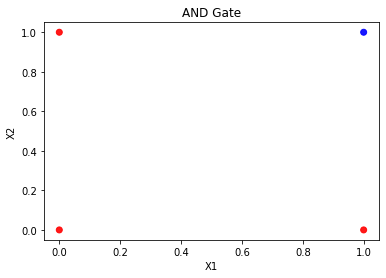

In [4]:
# Distribution of Data
plt.scatter(X[:,0], X[:,1], c=['b' if i==1 else 'r' for i in Y], alpha=0.9)
plt.title("AND Gate")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [5]:
# Initiate Hyperparameters
learning_rate = 0.2
epochs = 50

# Initiate the model
and_gate = GeneralLogisticRegression(X, Y, learning_rate, epochs)

In [6]:
# Compute the weights
weights = and_gate.train()
print("Weights: ", weights)

Weights:  [ 2.93115267 -1.7612842  -1.7612842 ]


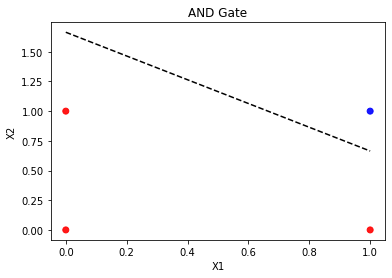

In [7]:
# Plot the classifier line
plt.scatter(X[:,0], X[:,1], c=['b' if i==1 else 'r' for i in Y], alpha=0.9)
plt.title("AND Gate")
plt.xlabel("X1")
plt.ylabel("X2")

j = np.array([0, 1])
k = -(j * weights[1] + weights[0]) / weights[2]
plt.plot(j, k, color='k', linestyle="--")
plt.show()

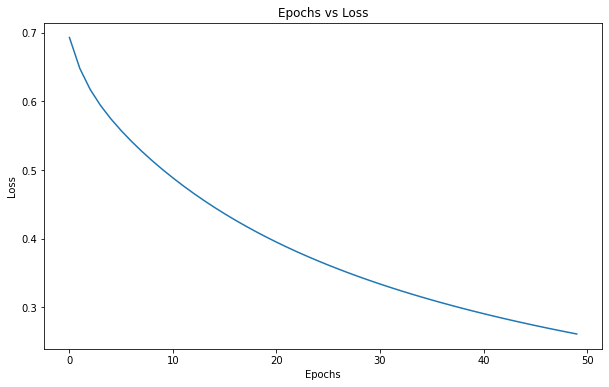

In [8]:
# Plot the loss history
fig= plt.figure(figsize=(10,6))
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(np.arange(epochs),and_gate.loss_history)
plt.show()

<div style='text-align: center;'>
    <h3>NOR Gate</h3>
</div>

In [9]:
# NOR Gate
# Training data
X = np.asarray([ [0,0], [0,1], [1,0], [1,1]])
Y = np.asarray([1, 0, 0, 0])

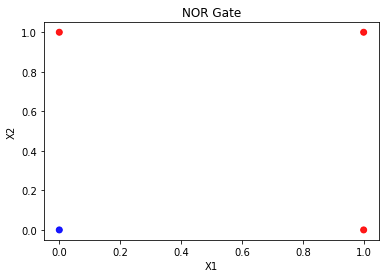

In [10]:
#Distribution of Data
plt.scatter(X[:,0], X[:,1], c=['b' if i==1 else 'r' for i in Y], alpha=0.9)
plt.title("NOR Gate")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [11]:
# Initiate Hyperparameters
learning_rate = 0.2
epochs = 50

# Initiate the model
nor_gate = GeneralLogisticRegression(X, Y, learning_rate, epochs)

In [12]:
# Compute the weights
weights = nor_gate.train()
print("Weights: ", weights)

Weights:  [-0.59183445  2.5123944   2.5123944 ]


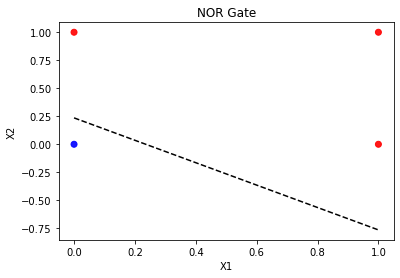

In [13]:
# Plot the classifier line
plt.scatter(X[:,0], X[:,1], c=['b' if i==1 else 'r' for i in Y], alpha=0.9)
plt.title("NOR Gate")
plt.xlabel("X1")
plt.ylabel("X2")

j = np.array([0, 1])
k = -(j * weights[1] + weights[0]) / weights[2]
plt.plot(j, k, color='k', linestyle="--")
plt.show()

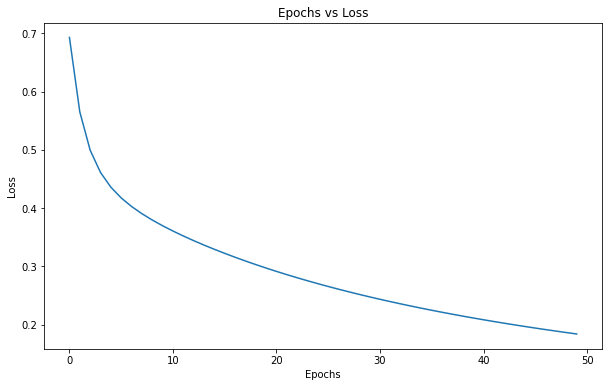

In [14]:
# Plot the loss history
fig= plt.figure(figsize=(10,6))
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(np.arange(epochs),nor_gate.loss_history)
plt.show()

<div style='text-align: center;'>
    <h3>XOR Gate</h3>
</div>

In [15]:
# NOR Gate
# Training data
X = np.asarray([ [0,0], [0,1], [1,0], [1,1]])
Y = np.asarray([0, 1, 1, 0])

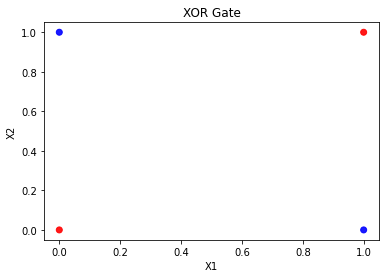

In [16]:
# Distribution of Data
plt.scatter(X[:,0], X[:,1], c=['b' if i==1 else 'r' for i in Y], alpha=0.9)
plt.title("XOR Gate")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [17]:
# Initiate Hyperparameters
learning_rate = 0.2
epochs = 50

# Initiate the model
xor_gate = GeneralLogisticRegression(X, Y, learning_rate, epochs)

In [18]:
# Compute the weights
weights = xor_gate.train()
print("Weights: ", weights)

Weights:  [0. 0. 0.]


For XOR gate, weights can't be computed because the ouput is not linearly separable. So, we represent XOR gate in terms of other logic gates.
\
\
XOR = NOR(NOR, AND)

In [19]:
#Computation-1
nor_pred = nor_gate.predict(X)
and_pred = and_gate.predict(X)

#Computation-2
a = [[and_pred[i], nor_pred[i]] for i in range(len(nor_pred))] #Intermediate Output
xor_pred = nor_gate.predict(a)
print(X)
print(xor_pred)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[1, 0, 0, 0]


**Note:**

If you want to add some additional features to the above implementation, here are a few ideas:

1. Return the history of thetas in addition to the history of losses
2. Implement early stopping
3. Model accuracy visualization in training

**Try it out!**
1. Try implementing XNOR gate
2. Use Least squares cost function and visualize the outputs